<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A14_Xinming_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 State the T-Test null hypothesis for this specific research question

Ho = There is no difference in mean annual temperature between the Mid-Atlantic and New England subregions.

Q2 State the T-Test alternative hypothesis for this specific research question.

Ha = There difference in mean annual temperature between the Mid-Atlantic and New England subregions is not equal to zero.

Q3 Explain how the degrees of freedom are determined for a 2-Sample T-Test?

Degrees of freedom are determined based on the number of samples (n) that serves as indepenet values from each group that is used to calculate the estimate. This is usually calculated as: DF = n - 1

Q4 What is the difference between a 2-Sample T-Test and a Paired T-Test?

In a two-sample test, we have two independent samples and we expect the two sets of measurements will not be correlated.Sample sizes for the two samples need not be equal. In a paired test we have one sample of pairs.  It is expected that the two measurements on pairs will be correlated

Q5 Explain the difference in calculating the T-Value when the two groups are assumed to have the same variance in comparison to when they are assumed to have a different variance

During the t test, since we know that the number of samples in the two dataset are the same then we can assume that the variance of the two datasets is also the same, which is appliable to the paired t test. And when there are two groups have different variance then we can expect that the variance of the two datasets is also different. Therefore a 2 sample t test is more applicable in this siutation. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy.stats
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 10]

In [ ]:
#Task 1 
countyT = pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/us_county_ttest.csv")
countyT.columns =[column.replace(" ", "_") for column in countyT.columns] 
countyT.reset_index(inplace = True)
countyT

,index,Unnamed:_0,NAME,STATE_NAME,STATE_ABBR,STATE_FIPS,COUNTY_FIP,FIPS,POPULATION,POP_SQMI,...,per_for,per_dev,per_wet,per_crop,per_past_grass,strm_length,strm_den,per_karst,rail_den,road_den
0,0,1,Franklin County,New York,NY,36,33,36033,47555,28.0,...,66.907978,3.492550,15.622229,2.512130,6.397975,30.122378,0.006858,12.941445,0.063075,1.122394
1,1,2,Livingston County,New York,NY,36,51,36051,61834,96.6,...,34.584413,8.055299,4.185600,37.486085,13.170933,63.339277,0.038196,7.617896,0.229102,2.208785
2,2,3,Clearfield County,Pennsylvania,PA,42,33,42033,80562,69.8,...,75.982068,7.619079,0.813272,0.872184,11.969102,87.374905,0.029219,0.000000,0.256697,3.182706
3,3,4,Fulton County,New York,NY,36,35,36035,53324,100.1,...,63.078727,6.383301,12.552822,1.063894,9.503514,14.470551,0.010485,14.057971,0.011693,1.341258
4,4,5,Mercer County,Pennsylvania,PA,42,85,42085,110652,162.1,...,47.408632,13.142611,3.561837,16.079352,17.685918,64.578437,0.036530,0.000000,0.212967,4.029442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,76,New Haven County,Connecticut,CT,9,9,9009,864835,1403.3,...,43.878157,43.244008,7.092843,0.586843,2.747188,22.054624,0.013817,0.000000,0.237713,5.530087
76,76,77,Fairfield County,Connecticut,CT,9,1,9001,957419,1487.7,...,43.727190,44.877676,6.098695,0.105454,1.817548,12.657104,0.007594,0.000000,0.180354,5.611503
77,77,78,Providence County,Rhode Island,RI,44,7,44007,660741,1537.3,...,48.214037,32.567582,9.254430,0.169865,4.752326,23.775392,0.021358,0.000000,0.384090,4.672937
78,78,79,Androscoggin County,Maine,ME,23,1,23001,111139,223.6,...,56.839929,12.167453,11.189478,0.754595,11.661338,68.748644,0.053396,0.000000,0.147992,2.329192


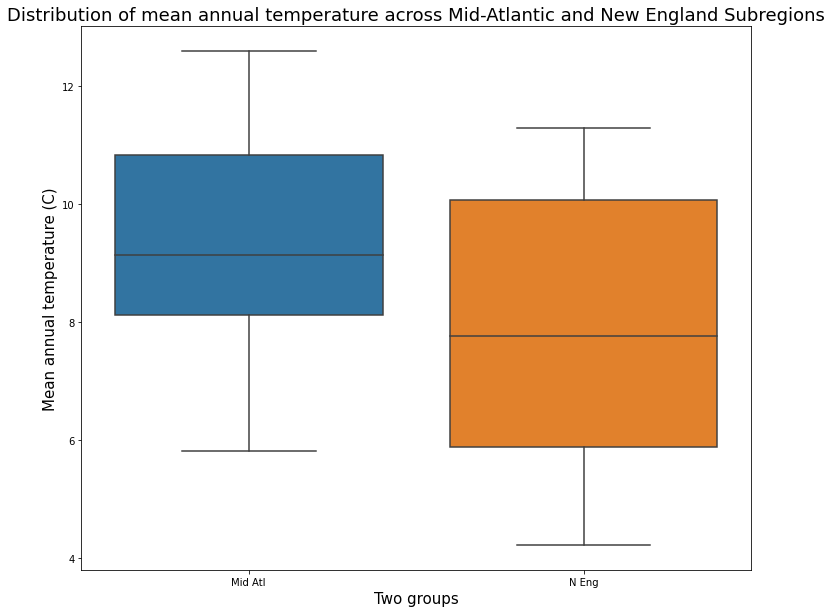

In [ ]:
#Task 2 Create a grouped boxplot that shows the distribution of mean annual temperature within the two groups.
twogroups = countyT.query('SUB_REGION == "Mid Atl" | SUB_REGION == "N Eng"')
box_plot, axs = plt.subplots(1,1)
sns.boxplot(ax = axs, x = "SUB_REGION", y = "tempmn", data = twogroups)
axs.set_title("Distribution of mean annual temperature across Mid-Atlantic and New England Subregions", fontsize = 18)
axs.set_xlabel("Two groups", fontsize = 15)
axs.set_ylabel("Mean annual temperature (C)", fontsize = 15)
plt.show(box_plot)

In [ ]:
#Task 3 Generate a function that calculates and returns the T-Value, p-value, degrees of
#freedom, Group 1 mean, and Group 2 mean. The calculations should assume that the
#groups do not have equal variance and that the test is two-sided. You cannot use a
#function that performs a T-Test directly (e.g., t.test() in R). Instead, you must perform
#the required calculations in code. You can use a function that calculates a p-value if
#provided the T-Value and the degrees of freedom. This is too difficult to code on your own.

MidA = countyT.query('SUB_REGION == "Mid Atl"')["tempmn"] # Group 1
NEng = countyT.query('SUB_REGION == "N Eng"')["tempmn"] # Group 2
np.random.seed(42)
MidA = MidA.sample(30)
NEng = NEng.sample(30)
group1 = MidA.to_numpy()
group2 = NEng.to_numpy()

def ttest(group1, group2):
  Grp1_m = np.mean(group1)
  Grp2_m = np.mean(group2)
  Grp1_var = np.var(group1)
  Grp2_var = np.var(group2)
  Grp1_n = len(group1)
  Grp2_n = len(group2)
  t_test = (Grp1_m - Grp2_m) / math.sqrt((Grp1_var / Grp1_n) + (Grp2_var / Grp2_n))
  df = (Grp1_n + Grp2_n) - 2
  p_val = scipy.stats.t.sf(abs(t_test), df)
  print("T-value = ", t_test)
  print("p-value = ", p_val)
  print("Degrees of freedom = ", df)
  print("Group 1 mean = ", Grp1_m)
  print("Group 2 mean = ", Grp2_m)

print(ttest(group1,group2))

T-value =  2.5906240710192736
p-value =  0.006048473929414625
Degrees of freedom =  58
Group 1 mean =  9.150592685266666
Group 2 mean =  7.817939895266666
None


Question 6. Based on the grouped boxplot, what do you expect to be the results of the TTest? Explain your reasoning.

The generated boxplot displayed the mean annual temperature between the Mid Atlantic and New England subregions. we can tell the mid-atlantic subregion has a higher mean annual temperature than the New England subregio, but New E region has a wider range of annual tempreture. From this observation I beleive that  the results of the T-test to show that there is a statistically significant difference of mean annual temperature between the two groups 


Question 7 . State the findings of the T-Test using standard statistical language

When the P value is smaller than 0.05, we can reject the null hypothesis that there is no difference between the mean annual temperature of the Mid Atlantic and New England subregions. Our output p value is around 0.001, which is smaller than 0.05, then we can reject the null hypothesis. Our  T-value is around 2.54, which indicates that there is a statistically significant difference between the two groups.From these statistical result we can determine that mean annual temperature of the Mid Atlantic subregion is greater than the New England subregion